In [1]:
%matplotlib inline

In [2]:
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.path import Path
import matplotlib

In [3]:
%run bioplotlib/collections.py
%run bioplotlib/gene_shapes.py

In [17]:
seq = SeqIO.read("bioplotlib/data/Sc-chr01.gb", 'genbank')

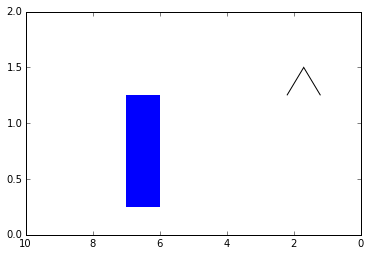

In [18]:
fig, ax = plt.subplots()
features = list()
exon = Rectangle()
verts, codes = exon(6, 0.25, 1)
p = Path(verts, codes)
ax.add_patch(patches.PathPatch(p, facecolor='blue', ec="none"))
intron = OpenTriangle(width=0.25, y_offset=1)
verts, codes = intron(1.2, .25, 1)
p = Path(verts, codes)
ax.add_patch(patches.PathPatch(p, facecolor='none'))

ax.set_xlim(10, 0)
ax.set_ylim(0, 2)

plt.show()

Path(array([[  1.56400000e+03,   0.00000000e+00],
       [  1.95100000e+03,   0.00000000e+00],
       [  1.95100000e+03,   1.00000000e+00],
       [  1.56400000e+03,   1.00000000e+00],
       [  1.56400000e+03,   0.00000000e+00]]), array([ 1,  2,  2,  2, 79], dtype=uint8)) 0
Path(array([[  2.04500000e+03,   0.00000000e+00],
       [  2.42600000e+03,   0.00000000e+00],
       [  2.42600000e+03,   1.00000000e+00],
       [  2.04500000e+03,   1.00000000e+00],
       [  2.04500000e+03,   0.00000000e+00]]), array([ 1,  2,  2,  2, 79], dtype=uint8)) 0
Path(array([[  3.36200000e+03,   0.00000000e+00],
       [  3.74300000e+03,   0.00000000e+00],
       [  3.74300000e+03,   1.00000000e+00],
       [  3.36200000e+03,   1.00000000e+00],
       [  3.36200000e+03,   0.00000000e+00]]), array([ 1,  2,  2,  2, 79], dtype=uint8)) 0
[<matplotlib.patches.PathPatch object at 0x7f51e0619c18>, <matplotlib.patches.PathPatch object at 0x7f51e0836358>, <matplotlib.patches.PathPatch object at 0x7f51e0836438>]


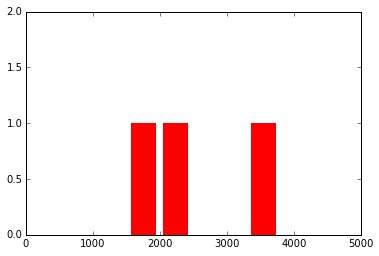

In [47]:
start = 10000
end = 15000
fig, ax = plt.subplots()
features = list()
exon = Rectangle()
intron = OpenTriangle(width=0.25, y_offset=1)
fc = ['red', 'yellow', 'blue']
for feature in seq[start:end].features:
    if feature.type == 'CDS':
        i = 0
        for part in feature.location.parts:
            verts, codes = exon(part.start, 0, part.end - part.start)
            p = Path(verts, codes)
            print(p, i)
            ax.add_patch(patches.PathPatch(p, facecolor=fc[i], ec="none"))
            #try:
            i += 1
            
            
ax.set_xlim(0, 5000)
ax.set_ylim(0, 2)
print(ax.patches)

plt.show()

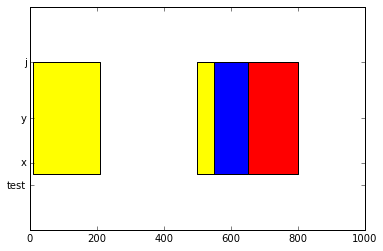

In [6]:
fig, ax = plt.subplots()
col = matplotlib.collections.PolyCollection([
    [(10, 7.5),(10, 12.5),(210, 12.5),(210, 7.5),(10, 7.5)],
    [(500, 7.5),(500, 12.5),(600, 12.5),(600, 7.5),(500, 7.5)]
    ], facecolors='yellow')
ax.add_collection(col)
ax.broken_barh([(700, -150)], (7.5, 5), facecolors='blue')
ax.broken_barh([(650, 150)], (7.5, 5), facecolors='red')
ax.set_ylim(5, 15)
ax.set_xlim(0, 1000)
ax.set_yticks([7, 8, 10, 12.5])
ax.set_yticklabels(["test", "x", "y", "j"])

plt.show()

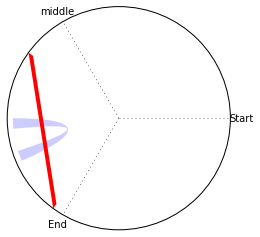

In [83]:
"""
Demo of a line plot on a polar axis.
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms
from matplotlib.projections.polar import InvertedPolarTransform

ax = plt.subplot(111, polar=True)

verts = [
    (np.pi * 1.1, 1.9), # left, bottom
    (0., 0.), # left, top
    (np.pi + 0.1, 1.9),
    (np.pi, 1.9), 
    (0., 0.), # left, top
    ((np.pi * 1.1) + 0.1, 1.9), # left, bottom
    ((np.pi * 1.0), 1.9), # left, bottom
]
codes = [
    Path.MOVETO,
    Path.CURVE3,
    Path.LINETO,
    Path.LINETO,
    Path.CURVE3,
    Path.LINETO,
    Path.CLOSEPOLY
    ]

p = Path(verts, codes)
ax.add_patch(patches.PathPatch(p, facecolor='blue', ec="none", alpha=0.2))

# add a rectangle
rect = patches.Rectangle([np.pi * 0.8, 1.9], np.pi/2, 0.1, ec="none", facecolor="red")
ax.add_patch(rect)
ax.set_rmax(2.)
ax.set_yticks([])
ax.set_xticks([0, 2 * np.pi/3, 4 * np.pi / 3])
ax.set_xticklabels(["Start", "middle", "End"])
#ax.set_axis_off()  # Supress the axis line
#ax.set_title("A line plot on a polar axis", va='bottom')
#ax.grid(False)
plt.show()

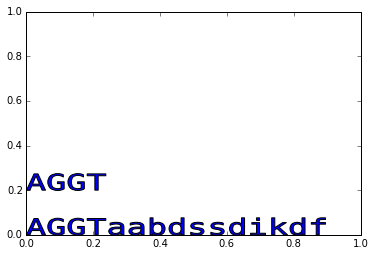

In [82]:
fp = mpl.font_manager.FontProperties(family="monospace", size=.1)
x = mpl.collections.PathCollection([mpl.textpath.TextPath((0,0), "AGGTaabdssdikdf", prop=fp), mpl.textpath.TextPath((0,0.2), "AGGT", prop=fp)])
ax = plt.subplot(111)
ax.add_collection(x)
plt.show()

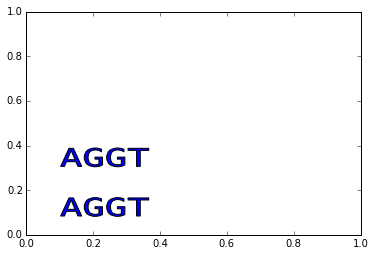

In [75]:
offset = mpl.transforms.ScaledTranslation(12, 12, fig.dpi_scale_trans)

In [51]:
offset

array([[   1.,    0.,  960.],
       [   0.,    1.,  960.],
       [   0.,    0.,    1.]])